<a href="https://colab.research.google.com/github/VictoireHA/computational-mechanics/blob/summer22/HW_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework
## Problems [Part 1](./01_Linear-Algebra.md)

1. Consider 4 masses connected in series to 4 springs with K=1,000 N/m. What are the final positions of the masses i.e. when acceleration is 0? 

![Springs-masses](../images/mass_springs.png)

The masses haves the following amounts, $m_1=1,~m_2=2,~m_3=3,~and~m_4=4 kg.$ Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [ ]:
import numpy as np
A=np.array([[2000,-1000,0,0],[-1000,2000,-1000,0],[0,-1000,2000,-1000],[0,0,-1000,-1000]])
b=np.array([10,20,30,40])
x=np.linalg.solve(A,b)
for i in range(0,4):
    print('[{:5.1f} {:5.1f} {:5.1f} {:5.1f}] {} [{:3.5f}] {} [{:5.1f}]'.format(*A[i],'*',x[i],'=',b[i]))

[2000.0 -1000.0   0.0   0.0] * [0.01429] = [ 10.0]
[-1000.0 2000.0 -1000.0   0.0] * [0.01857] = [ 20.0]
[  0.0 -1000.0 2000.0 -1000.0] * [0.00286] = [ 30.0]
[  0.0   0.0 -1000.0 -1000.0] * [-0.04286] = [ 40.0]


![HVAC diagram showing the flow rates and connections between floors](../images/hvac.png)

2. In the figure above you have an idealized Heating, Ventilation and Air conditioning (HVAC) system. In the current configuration, the three-room building is being cooled off by $15^oC$ air fed into the building at 0.1 kg/s. Our goal is to determine the steady-state temperatures of the rooms given the following information

* $\dot{m}_1=0.1~kg/s$
* $\dot{m}_2=0.12~kg/s$
* $\dot{m}_3=0.12~kg/s$
* $\dot{m}_4=0.1~kg/s$
* $\dot{m}_5=0.02~kg/s$
* $\dot{m}_6=0.02~kg/s$
* $C_p=1000~\frac{J}{kg-K}$
* $\dot{Q}_{in} = 300~W$
* $T_{in} = 12^{o} C$

The energy-balance equations for rooms 1-3 create three equations:

1. $\dot{m}_1 C_p T_{in}+\dot{Q}_{in}-\dot{m}_2 C_p T_{1}+\dot{m}_6 C_p T_{2} = 0$

2. $\dot{m}_2 C_p T_{1}+\dot{Q}_{in}+\dot{m}_5 C_p T_{3}-\dot{m}_3 C_p T_{2}-\dot{m}_6 C_p T_{2} = 0$

3. $\dot{m}_3 C_p T_{2}+\dot{Q}_{in}-\dot{m}_5 C_p T_{3}-\dot{m}_4 C_p T_{3} = 0$

Identify the unknown variables and constants to create a linear algebra problem in the form of $\mathbf{Ax}=\mathbf{b}$.

a. Create the matrix $\mathbf{A}$

b. Create the known vector $\mathbf{b}$

c. Solve for the unknown variables, $\mathbf{x}$

d. What are the warmest and coldest rooms? What are their temperatures?

**a.  A=[[m2*cp,-m6*cp,0],[-m2*cp,(m3+m6)*cp,-m5*cp],[0,-m3*cp,(m4+m5)*cp]]**


**b.  B=[Qin+(m1*cp*Tin),Qin,Qin]**

In [ ]:
import numpy as np

m1=0.1
m2=0.12
m3=0.12
m4=0.1
m5=0.02
m6=0.02
cp=1000.0
Qin=300.0
Tin=12.0

A=np.array([[m2*cp,-m6*cp,0],[-m2*cp,(m3+m6)*cp,-m5*cp],[0,-m3*cp,(m4+m5)*cp]])
b=np.array([Qin+(m1*cp*Tin),Qin,Qin])
x=np.linalg.solve(A,b)
for i in range(0,3):
    print('[{:5.1f} {:5.1f} {:5.1f}] {} [{:3.5f}] {} [{:5.1f}]'.format(*A[i],'*',x[i],'=',b[i]))

[120.0 -20.0   0.0] * [15.58333] = [1500.0]
[-120.0 140.0 -20.0] * [18.50000] = [300.0]
[  0.0 -120.0 120.0] * [21.00000] = [300.0]


**d.**
**T1-Coolest**

**T3-Warmest**

3. The [Hilbert Matrix](https://en.wikipedia.org/wiki/Hilbert_matrix) has a high condition number and as the matrix increases dimensions, the condition number increases. Find the condition number of a 

a. $1 \times 1$ Hilbert matrix

b. $5 \times 5$ Hilbert matrix

c. $10 \times 10$ Hilbert matrix

d. $15 \times 15$ Hilbert matrix

e. $20 \times 20$ Hilbert matrix

If the accuracy of each matrix element is $\approx 10^{-16}$, what is the expected rounding error in the solution $\mathbf{Ax} = \mathbf{b}$, where $\mathbf{A}$ is the Hilbert matrix.

## Problems [Part 2](./02_Gauss_elimination.md)

1. 4 masses are connected in series to 4 springs with K=100N/m. What are the final positions of the masses? 

![Springs-masses](../images/mass_springs.png)

The masses haves the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form K=100 N/m:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

![Triangular truss](../images/truss.png)

For problems __2-3__, consider the simple 3-element triangular truss, shown above, with a point load applied at the tip. The goal is to understand what tension is in the horizontal element, $P_1$. In problem __2__, the applied force is verical $(\theta=0)$ and in problem __3__ the applied force varies in angle $(\theta \neq 0)$. 

2. In the truss shown above, calculate the tension in bar 1, $P_1$, when $\theta=0$. When $\theta=0$, the $\sum F=0$ at each corner creates 3 equations and 3 unknowns as such (here, you reduce the number of equations with symmetry, $P_2=P_3,~R_2=R_3,~and~R_1=0$ ). 

$\left[ \begin{array}{ccc}
1 & \cos\alpha & 0 \\
0 & -2\cos\beta/2 & 0 \\
0 & \sin\alpha &  1 \\
 \end{array} \right]
\left[ \begin{array}{c}
P_{1} \\
P_{2} \\
R_{2} \end{array} \right]=
\left[ \begin{array}{c}
0 \\
F \\
0 \end{array} \right]$

a. Create the system of equations, $\mathbf{Ax}=\mathbf{b}$, when $\alpha=35^o$, $\beta=40^o$, and $F=1~kN$. Use __Gauss elimination__ to solve for $P_1,~P_2,~and~R_2$. What is the resulting augmented matrix, $\mathbf{A|y}$ after Gauss elimination?

b. Solve for the $\mathbf{LU}$ decomposition of $\mathbf{A}$. 

c. Use the $\mathbf{LU}$ solution to solve for the tension in bar 1 $(P_1)$ every 10 N values of force, F, between 100 N and 1100 N. Plot $P_1~vs~F$.

In [ ]:
def GaussNaive(A,y):
    '''GaussNaive: naive Gauss elimination
    x = GaussNaive(A,b): Gauss elimination without pivoting.
    solution method requires floating point numbers, 
    as such the dtype is changed to float
    
    Arguments:
    ----------
    A = coefficient matrix
    y = right hand side vector
    returns:
    ---------
    x = solution vector
    Aug = augmented matrix (used for back substitution)'''
    [m,n] = np.shape(A)
    Aug = np.block([A,y.reshape(n,1)])
    Aug = Aug.astype(float)
    if m!=n: error('Matrix A must be square')
    nb = n+1
    # Gauss Elimination 
    for k in range(0,n-1):
        for i in range(k+1,n):
            if Aug[i,k] != 0.0:
                factor = Aug[i,k]/Aug[k,k]
                Aug[i,:] = Aug[i,:] - factor*Aug[k,:]
    # Back substitution
    x=np.zeros(n)
    for k in range(n-1,-1,-1):
        x[k] = (Aug[k,-1] - Aug[k,k+1:n]@x[k+1:n])/Aug[k,k]
    return x,Aug

In [ ]:
import math

sin35=math.sin(math.radians(35))
cos35=math.sin(math.radians(35))
cos20=math.sin(math.radians(20))

A=np.array([[1,cos35, 0],[0,(-2*cos20),0],[ 0,sin35,1]])
y=np.array([0,1000,0])

x, Aug = GaussNaive(A,y)

print('x=  \t\tAug=')
for i in range(len(x)):
    print('{:.2f}\t\t'.format(x[i]),Aug[i])

x=  		Aug=
838.51		 [1.         0.57357644 0.         0.        ]
-1461.90		 [ 0.00000000e+00 -6.84040287e-01  0.00000000e+00  1.00000000e+03]
838.51		 [  0.           0.           1.         838.51265422]


3. Using the same truss as shown above, let's calculate the tension in bar 1, $P_1$, when $\theta=[0...90^o]$ and $F=[100...1100]~kN$. When $\theta\neq 0$, the resulting 6 equations and 6 unknowns are given in the following matrix

$\left[ \begin{array}{ccc}
0 & \sin\alpha & 0 & 1 & 0 & 0 \\
1 & \cos\alpha & 0 & 0 & 1 & 0 \\
0 & \cos\beta/2 & \cos\beta/2 & 0 & 0 & 0 \\
0 & -\sin\beta/2 & \sin\beta/2 & 0 & 0 & 0 \\
-1 & 0 & \cos\alpha & 0 & 0 & 0 \\
0 & 0 & \sin\alpha & 0 & 0 & 1 \\
 \end{array} \right]
\left[ \begin{array}{c}
P_{1} \\
P_{2} \\
P_{3} \\
R_{1} \\
R_{2} \\
R_{3}\end{array} \right]=
\left[ \begin{array}{c}
0 \\
0 \\
F\cos\theta \\
-F\sin\theta \\
0 \\
0 \end{array} \right]$

a. Create the system of equations, $\mathbf{Ax}=\mathbf{b}$, when $\alpha=35^o$, $\beta=40^o$, $\theta=45^o=\pi/4$, and $F=1~kN$. Use __Gauss elimination__ to solve for $P_1,~P_2,~P_3,~R_1,~R_2,~and~R_3$. What is the resulting augmented matrix, $\mathbf{A|y}$ after Gauss elimination? _Hint: do you see a problem with the order of the equations? How can you __pivot__ to fix it?_

b. Solve for the $\mathbf{PLU}$ decomposition of $\mathbf{A}$. 

c. Use the $\mathbf{PLU}$ solution to solve for the tension in bar 1 $(P_1)$ every 10 N values of force, F, between 100 N and 1100 N. Plot $P_1~vs~F$.

## Problems [Part 3](./03_Linear-regression-algebra.md)

<img
src="https://i.imgur.com/LoBbHaM.png" alt="prony series diagram"
style="width: 300px;"/> <img src="https://i.imgur.com/8i140Zu.png" alt
= "stress relax data" style="width: 400px;"/> 

Viscoelastic Prony series model and stress-vs-time relaxation curve of wheat kernels [[3]](https://www.cerealsgrains.org/publications/plexus/cfw/pastissues/2013/Documents/CFW-58-3-0139.pdf). Stress relaxation curve of a wheat kernel from regressed equation data that illustrate where to locate relaxation times (vertical dotted lines) and stresses (horizontal black marks). $\sigma$ = stress; t = time.

2. [Viscoelasticity](https://en.wikipedia.org/wiki/Viscoelasticity) is a property of materials that exhibit stiffness, but also tend to flow slowly. One example is [Silly Putty](https://en.wikipedia.org/wiki/Silly_Putty), when you throw a lump it bounces, but if you leave it on a table it _creeps_, slowly flowing downwards. In the stress-vs-time plot above, a wheat kernel was placed under constant strain and the stress was recorded. In a purely elastic material, the stress would be constant. In a purely viscous material, the stress would decay to 0 MPa. 

Here, you have a viscoelastic material, so there is some residual elastic stress as $t\rightarrow \infty$. The researchers used a 4-part [Prony series](https://en.wikipedia.org/wiki/Prony%27s_method) to model viscoelasticity. The function they fit was

$\sigma(t) = a_1 e^{-t/1.78}+a_2 e^{-t/11}+a_3e^{-t/53}+a_4e^{-t/411}+a_5$

a. Load the data from the graph shown above in the file `../data/stress_relax.dat`. 

b. Create a $\mathbf{Z}$-matrix to perform the least-squares regression for the given Prony series equation $\mathbf{y} = \mathbf{Za}$.

c. Solve for the constants, $a_1,~a_2,~a_3,~a_4~,a_5$

d. Plot the best-fit function and the data from `../data/stress_relax.dat` _Use at least 50 points in time to get a smooth best-fit line._

Text(0, 0.5, 'Stress')

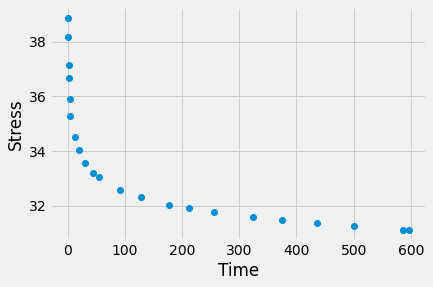

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

xy_data = np.loadtxt('stress_relax.dat',delimiter=',')
x=xy_data[:,0];
y=xy_data[:,1];
plt.plot(x,y,'o')
plt.xlabel('Time')
plt.ylabel('Stress')

In [ ]:
import math

aa=round(math.exp(-1/1.78))
print(aa)
#Z=np.block([[round.astype(float))],[round(math.exp(-x/11).astype(float))],[round(math.exp(-x/53).astype(float))],[round(math.exp(-x/411).astype(float))],[1]])
#Z

1


3. Load the '../data/primary-energy-consumption-by-region.csv' that has the energy consumption of different regions of the world from 1965 until 2018 [Our world in Data](https://ourworldindata.org/energy). 
You are going to compare the energy consumption of the United States to all of Europe. Load the data into a pandas dataframe. *Note: you can get certain rows of the data frame by specifying what you're looking for e.g. 
`EUR = dataframe[dataframe['Entity']=='Europe']` will give us all the rows from Europe's energy consumption.*

a. Use a piecewise least-squares regression to find a function for the energy consumption as a function of year

energy consumed = $f(t) = At+B+C(t-1970)H(t-1970)$

c. What is your prediction for US energy use in 2025? How about European energy use in 2025?